In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC, LinearSVC
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [2]:
!pip install imblearn

## read the file

In [2]:
df=pd.read_csv('bank-additional-full (1).csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## How many Rows and columns

In [4]:
df.shape

(41188, 21)

## the columns in the dataset 

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Information about the data 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Ckeck the null value 

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## describe the data 

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Check for duplicates in the dataset

In [9]:
len(df)-len(df.drop_duplicates())

12

there is 12 drop_duplicates in our dataset

## Drop the duplicates in the dataset

In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(41176, 21)

In [12]:
df['y'].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

In [13]:
def trans(x):
    if x=='no' :
        return 0
    elif x=='yes' :
        return 1

In [14]:
df.y.replace(('yes', 'no'), (1, 0), inplace=True)

## the Y columns before we do the balance

Text(0.5, 1.0, 'y Count Distribution')

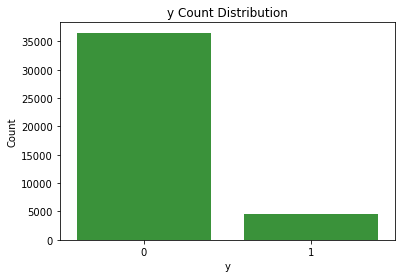

In [15]:
uniform_color=sns.color_palette()[2]
sns.countplot(data=df,x='y',color=uniform_color)
plt.xlabel('y')
plt.ylabel('Count')
plt.title('y Count Distribution')

In [16]:
# example of random undersampling to balance the class distribution
from collections import Counter
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler 
# define dataset
X = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']]
y = df['y']
# summarize class distribution
print()
print("The data distrubtion before undersampling :")
print(Counter(y))
print()
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X ,y)
# summarize class distribution
print("The data distrubtion after undersampling :")
print(Counter(y_over))
print()


The data distrubtion before undersampling :
Counter({0: 36537, 1: 4639})

The data distrubtion after undersampling :
Counter({0: 4639, 1: 4639})



In [17]:
df = pd.DataFrame(X_over, columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']) 

In [18]:
df['y'] = y_over

## the Y columns after we do the balance

Text(0.5, 1.0, 'y Count Distribution')

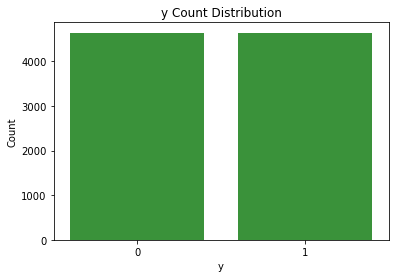

In [19]:
uniform_color=sns.color_palette()[2]
sns.countplot(data=df,x='y',color=uniform_color)
plt.xlabel('y')
plt.ylabel('Count')
plt.title('y Count Distribution')

## Lets evaluate the outlier 

98
17


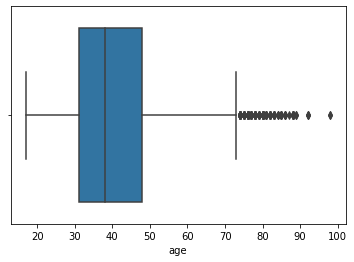

In [20]:
print(df['age'].max())
print(df['age'].min())
sns.boxplot(df['age']);

Age has some outliers

##  plot the heatmap

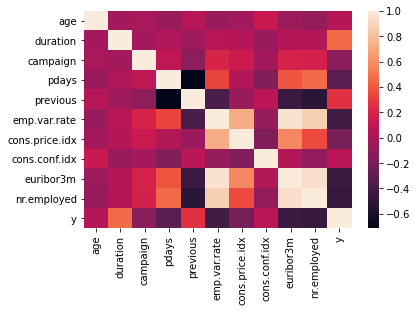

In [21]:
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns);

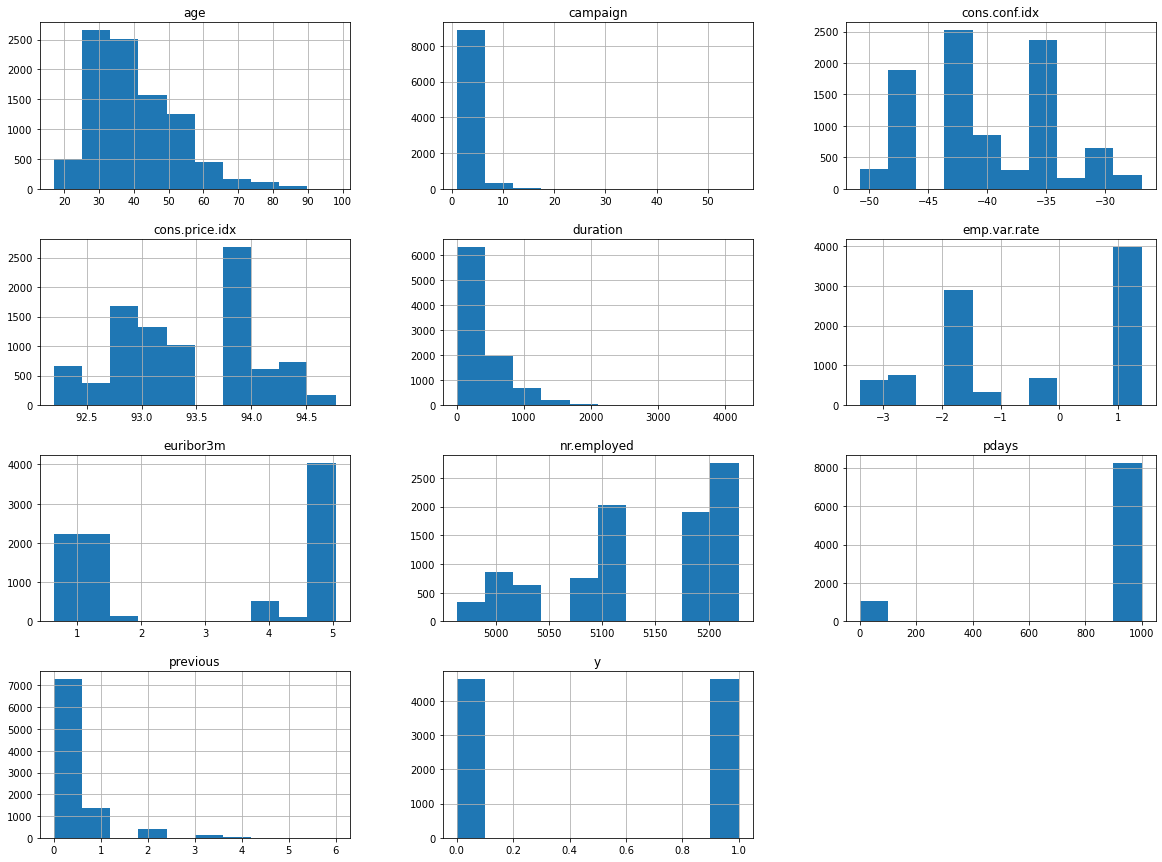

In [22]:
df.hist(figsize=(20,15));

In [23]:
#df=df.drop(columns=['day_of_week','month','contact','poutcome','pdays'],axis=1)

In [24]:
df=df.drop(columns=['default'],axis=1)

Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')


In [25]:
df['housing'].value_counts()

yes        4893
no         4152
unknown     233
Name: housing, dtype: int64

In [26]:
df.housing.replace(('yes', 'no'), (1, 0), inplace=True)

In [27]:
df.drop(df[(df['housing'] == "unknown")].index, inplace = True)

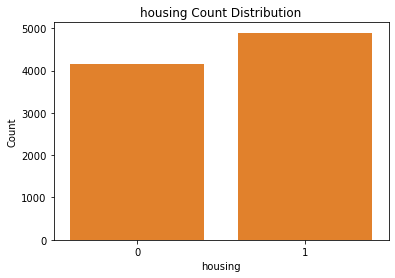

In [28]:
uniform_color=sns.color_palette()[1]
sns.countplot(data=df,x='housing',color=uniform_color)
plt.xlabel('housing')
plt.ylabel('Count')
plt.title('housing Count Distribution');

Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')


In [29]:
df['loan'].value_counts()

no     7644
yes    1401
Name: loan, dtype: int64

In [30]:
df.loan.replace(('yes', 'no'), (1, 0), inplace=True)

In [31]:
df.drop(df[(df['loan'] == "unknown")].index, inplace = True)

/Users/saraali/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


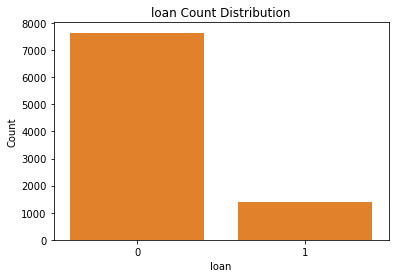

In [32]:
uniform_color=sns.color_palette()[1]
sns.countplot(data=df,x='loan',color=uniform_color)
plt.xlabel('loan')
plt.ylabel('Count')
plt.title('loan Count Distribution');

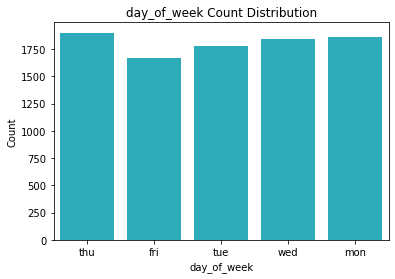

In [33]:
uniform_color=sns.color_palette()[9]
sns.countplot(data=df,x='day_of_week',color=uniform_color)
plt.xlabel('day_of_week')
plt.ylabel('Count')
plt.title('day_of_week Count Distribution');

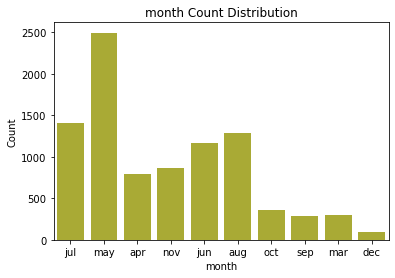

In [34]:
uniform_color=sns.color_palette()[8]
sns.countplot(data=df,x='month',color=uniform_color)
plt.xlabel('month')
plt.ylabel('Count')
plt.title('month Count Distribution');

In [35]:
print("--------------")
print(df["job"].unique())
print("--------------")
print(df["marital"].unique())
print("--------------")
print(df["education"].unique())
print("--------------")
print(df["housing"].unique())
print("--------------")
print(df["loan"].unique())
print("--------------")
print(df["duration"].unique())
print("--------------")
print(df["campaign"].unique())
print("--------------")
print(df["previous"].unique())
print("--------------")
print(df["y"].unique())
print("--------------")

--------------
['blue-collar' 'admin.' 'technician' 'services' 'management' 'unemployed'
 'retired' 'self-employed' 'housemaid' 'student' 'entrepreneur' 'unknown']
--------------
['divorced' 'single' 'married' 'unknown']
--------------
['basic.4y' 'university.degree' 'professional.course' 'high.school'
 'basic.9y' 'basic.6y' 'unknown' 'illiterate']
--------------
[1 0]
--------------
[1 0]
--------------
[  80  132  181 ...  759 1556 1868]
--------------
[ 1  2  4  5  3  7 21  9 17  6  8 10 14 15 12 13 20 16 22 18 19 11 23 24
 28 27 31]
--------------
[0 1 2 4 3 6 5]
--------------
[0 1]
--------------


In [36]:
df.drop(df[(df['marital'] == "unknown")].index, inplace = True)

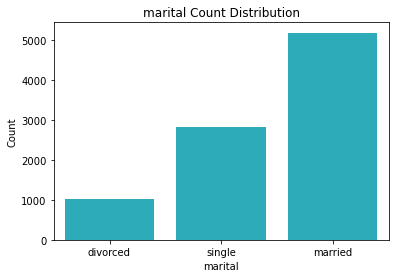

In [37]:
uniform_color=sns.color_palette()[9]
sns.countplot(data=df,x='marital',color=uniform_color)
plt.xlabel('marital')
plt.ylabel('Count')
plt.title('marital Count Distribution');

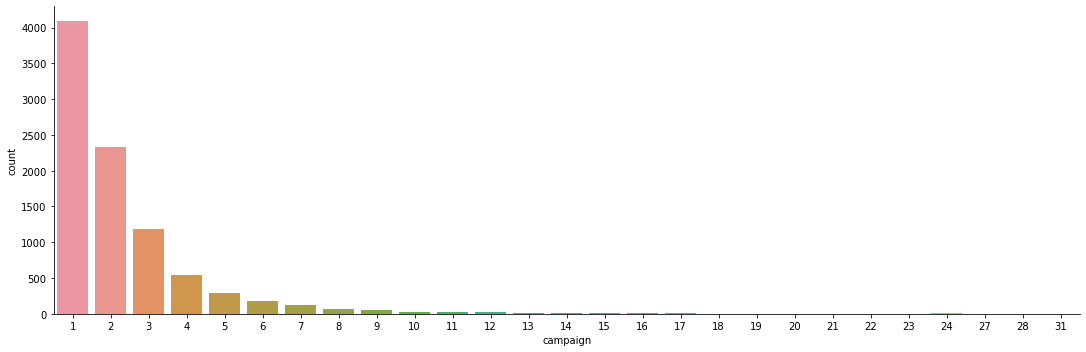

In [38]:
sns.catplot('campaign',kind = 'count',data = df,aspect =3);

In [39]:
df2 = pd.get_dummies(df)
df2.head()

,age,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,54,1,80,1,999,0,1.4,93.918,-42.7,4.963,...,0,0,0,0,1,0,0,0,1,0
1,38,0,132,1,999,0,-1.8,92.893,-46.2,1.313,...,0,0,1,0,0,0,0,0,1,0
2,37,0,181,2,999,0,-1.8,93.075,-47.1,1.405,...,0,0,1,0,0,0,0,0,1,0
3,33,0,52,1,999,0,-0.1,93.200,-42.0,4.153,...,0,0,0,0,0,1,0,0,1,0
4,40,0,246,4,999,1,-1.8,92.893,-46.2,1.334,...,0,0,0,0,0,0,1,1,0,0


df3=df2.drop(columns=['job_unknown','marital_divorced','education_unknown'],axis=1)
df3.describe().T

In [40]:
df=df.drop(['emp.var.rate','cons.price.idx','euribor3m','nr.employed','cons.conf.idx'],axis=1)

In [41]:
df.drop(df[(df['marital'] == "unknown")].index, inplace = True)

married > 1 , single > 2,divorced > 3

# Some Quation

# َQ1 is the Marital with Housing associated with the if the client will subscribe a term deposit  

y
marital  housing          
divorced 0        0.541053
         1        0.537893
married  0        0.536311
         1        0.513243
single   0        0.456196
         1        0.424145

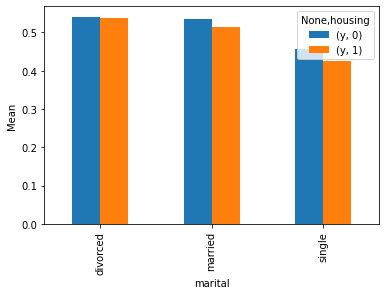

In [42]:
df["y"]=pd.get_dummies(df["y"]);
df.groupby(['marital','housing'])[["y"]].mean().unstack().plot(kind='bar').set_ylabel('Mean');
df.groupby(['marital','housing'])[["y"]].mean()
#married > 1 , single > 2,divorced > 3

# َQ2 Most of the month is the interaction with the data

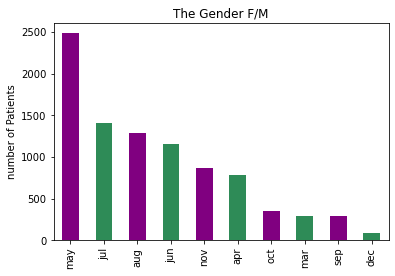

In [43]:
gender = df['month'].value_counts().plot.bar(color=('purple','seagreen'));
gender.set_xticklabels(["may", "jul","aug","jun","nov","apr","oct","mar","sep","dec"]);
gender.set_ylabel("number of Patients");
gender.set_title('The Gender F/M');



In [44]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,54,blue-collar,divorced,basic.4y,1,1,cellular,jul,thu,80,1,999,0,nonexistent,1
1,38,admin.,single,university.degree,1,0,cellular,may,fri,132,1,999,0,nonexistent,1
2,37,technician,married,professional.course,0,0,cellular,apr,fri,181,2,999,0,nonexistent,1
3,33,admin.,married,university.degree,1,0,cellular,nov,tue,52,1,999,0,nonexistent,1
4,40,services,married,high.school,0,0,cellular,may,wed,246,4,999,1,failure,1


# SVM Models

In [45]:
df_features=df[['age', 'loan', 'duration', 'campaign', 'pdays', 'previous']]
df_target=df[['y']].values
#df_features=df3.drop(columns=['y'],axis=1).values
x1_train, x1_test, y1_train, y1_test = train_test_split(df_features, df_target, test_size = 0.3, random_state = 0)

In [46]:
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

In [47]:
from sklearn import svm
linear_svc = svm.SVC(kernel='linear',probability=True)#LinearSVC()
linear_svc.fit(x1_train, y1_train)
Y_pred = linear_svc.predict(x1_test)
acc_linear_svc = linear_svc.score(x1_train, y1_train)
print("Prediction Accuracy: ",acc_linear_svc)
print("the targer class " ,linear_svc.classes_)
print("the intercept ",linear_svc.intercept_)
print("the coefficients",linear_svc.coef_)

/Users/saraali/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Prediction Accuracy:  0.7885985748218527
the targer class  [0 1]
the intercept  [-0.18983739]
the coefficients [[-0.09144328  0.03942813 -1.57723382  0.14856483  0.53273174 -0.21659487]]


In [48]:
#linear_svc = LinearSVC()
#linear_svc.fit(x1_train, y1_train)


Y_pred = linear_svc.predict(x1_test)
acc_linear_svc = linear_svc.score(x1_train, y1_train)
print("Prediction Accuracy: ",acc_linear_svc)
print("Accuracy:",metrics.accuracy_score(y1_test, Y_pred))
print("Precision:",metrics.precision_score(y1_test, Y_pred))
print("Recall:",metrics.recall_score(y1_test, Y_pred))



Prediction Accuracy:  0.7885985748218527
Accuracy: 0.7783524196527521
Precision: 0.7388493859082095
Recall: 0.8536221060492906


In [49]:
print(classification_report(y1_test, Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76      1368
           1       0.74      0.85      0.79      1339

    accuracy                           0.78      2707
   macro avg       0.78      0.78      0.78      2707
weighted avg       0.79      0.78      0.78      2707



In [50]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y1_test, Y_pred)
cnf_matrix

array([[ 964,  404],
       [ 196, 1143]])

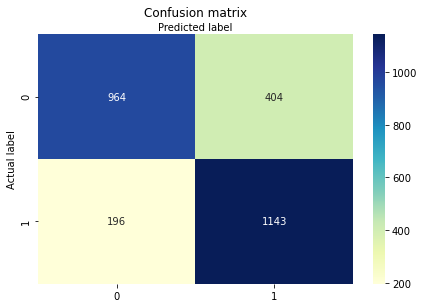

In [51]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');


# ------------------------------------------------------------------------------------------------------------------

# LogisticRegression

/Users/saraali/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/saraali/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/saraali/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/saraali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1372, in fit
    raise ValueError("This solver needs samples of at least 2 classes"
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains

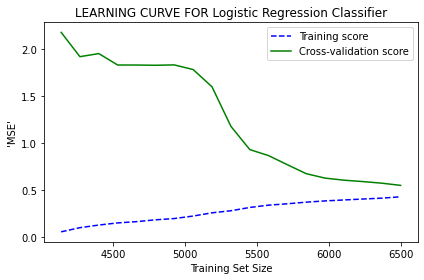

In [52]:
import numpy as np
from sklearn.model_selection import learning_curve
sizes, training_scores, testing_scores = learning_curve(LogisticRegression(), df_features, df_target, cv=10, scoring='neg_log_loss', train_sizes=np.linspace(0.01, 0.8, 50))

mean_training = np.mean(-training_scores, axis=1) 

# Mean and Standard Deviation of testing scores 
mean_testing = np.mean(-testing_scores, axis=1) 
  
# dotted blue line is for training scores and green line is for cross-validation score 
plt.plot(sizes, mean_training, '--', color="b",  label="Training score") 
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score") 
  
# Drawing plot 
plt.title("LEARNING CURVE FOR Logistic Regression Classifier") 
plt.xlabel("Training Set Size"), plt.ylabel("'MSE'"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()

In [53]:
logreg2=LogisticRegression(C=100,penalty="l2", max_iter=10000) 
logreg2.fit(x1_train,y1_train)
print("score",logreg2.score(x1_test,y1_test))
print("the targer class " ,logreg2.classes_)
print("the intercept ",logreg2.intercept_)
print("the coefficients",logreg2.coef_)

score 0.7790912449205762
the targer class  [0 1]
the intercept  [-0.32061125]
the coefficients [[-0.14716768  0.05700535 -1.97275906  0.30085308  0.77708142 -0.34399254]]


/Users/saraali/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [57]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

predictions = logreg2.predict(x1_test)

#print("Confusion Matrix:")
#print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y1_test, predictions))



Classification Report
              precision    recall  f1-score   support

           0       0.83      0.71      0.77      1368
           1       0.74      0.85      0.79      1339

    accuracy                           0.78      2707
   macro avg       0.78      0.78      0.78      2707
weighted avg       0.78      0.78      0.78      2707



In [58]:
print("Accuracy:",metrics.accuracy_score(y1_test, predictions))
print("Precision:",metrics.precision_score(y1_test, predictions))
print("Recall:",metrics.recall_score(y1_test, predictions))

Accuracy: 0.7790912449205762
Precision: 0.7426326129666012
Recall: 0.8469006721433906


In [59]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y1_test, predictions)
cnf_matrix

array([[ 975,  393],
       [ 205, 1134]])

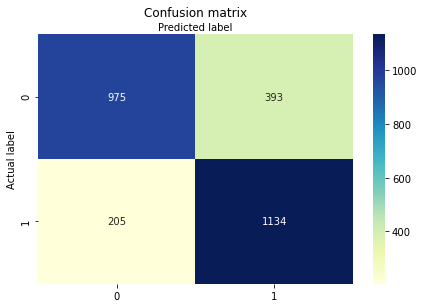

In [60]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

x1_train, x1_test, y1_train, y1_test = train_test_split(df_features, df_target, test_size = 0.3, random_state = 0)

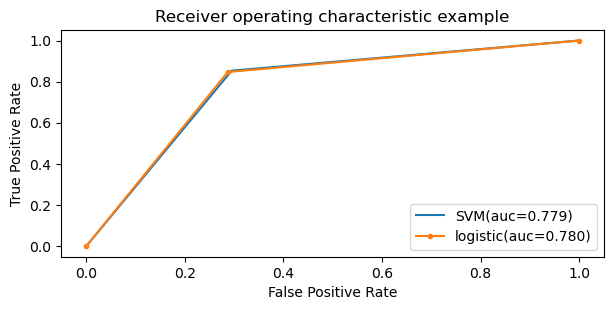

In [61]:
logustic_fpr,logustic_tpr,threshold = roc_curve(y1_test,predictions)
auc_logistic=auc(logustic_fpr,logustic_tpr)



svm_fpr,svm_tpr,threshold = roc_curve(y1_test,Y_pred)
auc_svm=auc(svm_fpr,svm_tpr)
plt.figure(figsize=(7,3),dpi=100)
plt.plot(svm_fpr,svm_tpr,linestyle='-',label='SVM(auc=%0.3f)'%auc_svm)
plt.plot(logustic_fpr,logustic_tpr,marker='.',label='logistic(auc=%0.3f)'%auc_logistic)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend()
plt.show()




In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve
sizes, training_scores, testing_scores = learning_curve(svm.SVC(kernel='linear',probability=True), df_features, df_target, cv=10, scoring='neg_log_loss', train_sizes=np.linspace(0.01, 0.8, 50))

mean_training = np.mean(-training_scores, axis=1) 

# Mean and Standard Deviation of testing scores 
mean_testing = np.mean(-testing_scores, axis=1) 
  
# dotted blue line is for training scores and green line is for cross-validation score 
plt.plot(sizes, mean_training, '--', color="b",  label="Training score") 
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score") 
  
# Drawing plot 
plt.title("LEARNING CURVE FOR Logistic Regression Classifier") 
plt.xlabel("Training Set Size"), plt.ylabel("'MSE'"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()